In [ ]:
pip install plotnine


In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("ATL.csv")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2520 rows containing missing values.


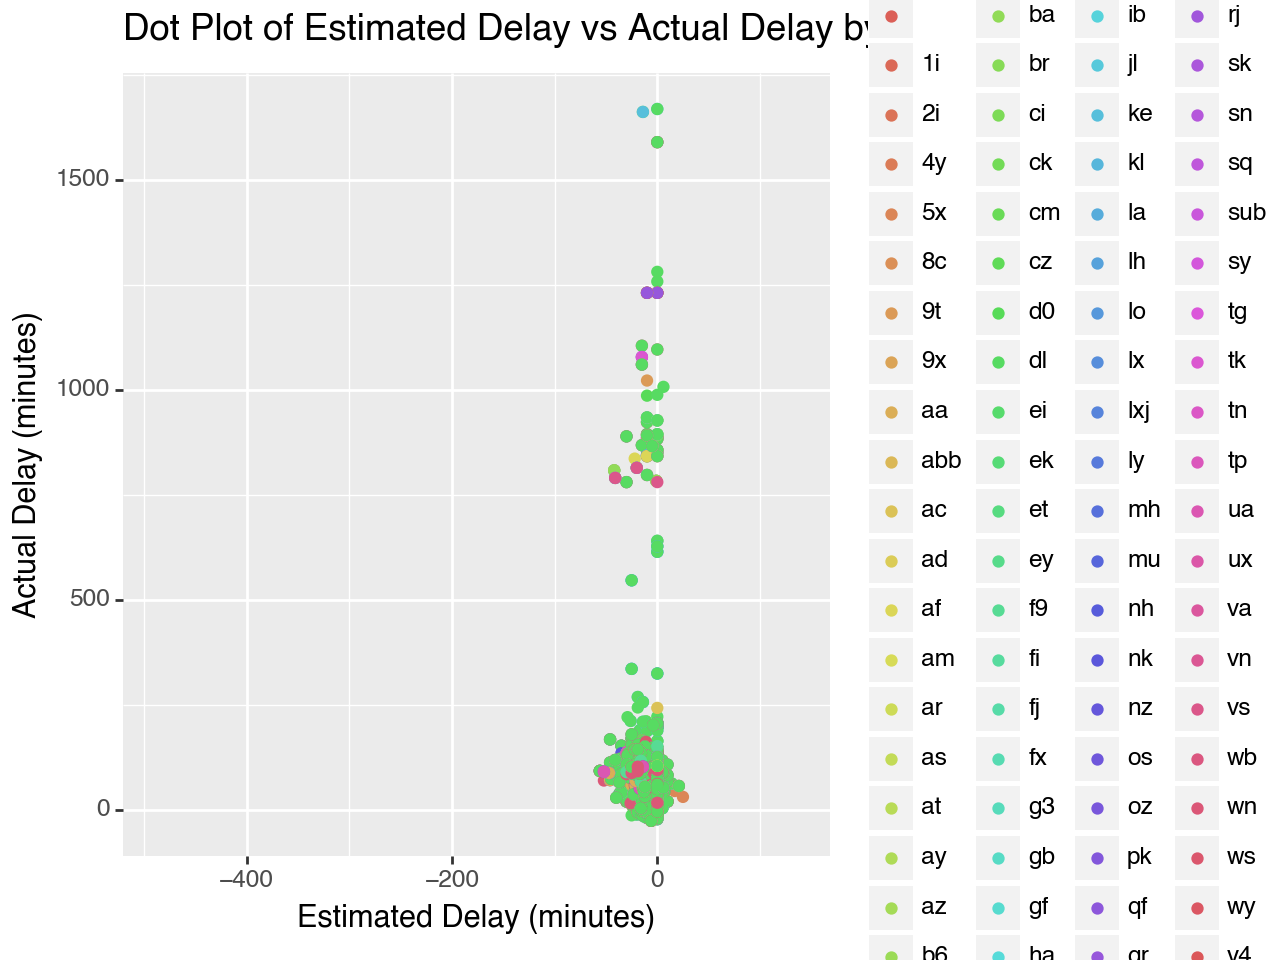

In [6]:
# good, but has some problems like negative values and too clustered
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("ATL.csv")

# Assuming your DataFrame has columns like 'departure', 'active', 'arrival', 'airline', and 'flight'

# Function to extract scheduled time from departure details
def extract_scheduled_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('scheduledTime', pd.NaT))

# Function to extract estimated time from departure details
def extract_estimated_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('estimatedTime', pd.NaT))

# Extract relevant information using the defined functions
df['scheduledTime'] = df.apply(extract_scheduled_time, axis=1)
df['estimatedTime'] = df.apply(extract_estimated_time, axis=1)
df['estimatedDelay'] = (df['scheduledTime'] - df['estimatedTime']).dt.total_seconds() / 60.0
df['actualDelay'] = (pd.to_datetime(df['arrival'].apply(lambda x: eval(x).get('estimatedTime', pd.NaT))) - df['scheduledTime']).dt.total_seconds() / 60.0
df['airline'] = df['airline'].apply(lambda x: eval(x)['iataCode'])

# Plotting using plotnine
p = ggplot(df, aes(x='estimatedDelay', y='actualDelay', color='airline')) + \
    geom_point() + \
    labs(title='Dot Plot of Estimated Delay vs Actual Delay by Airline',
         x='Estimated Delay (minutes)',
         y='Actual Delay (minutes)')

# Show the plot
print(p)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


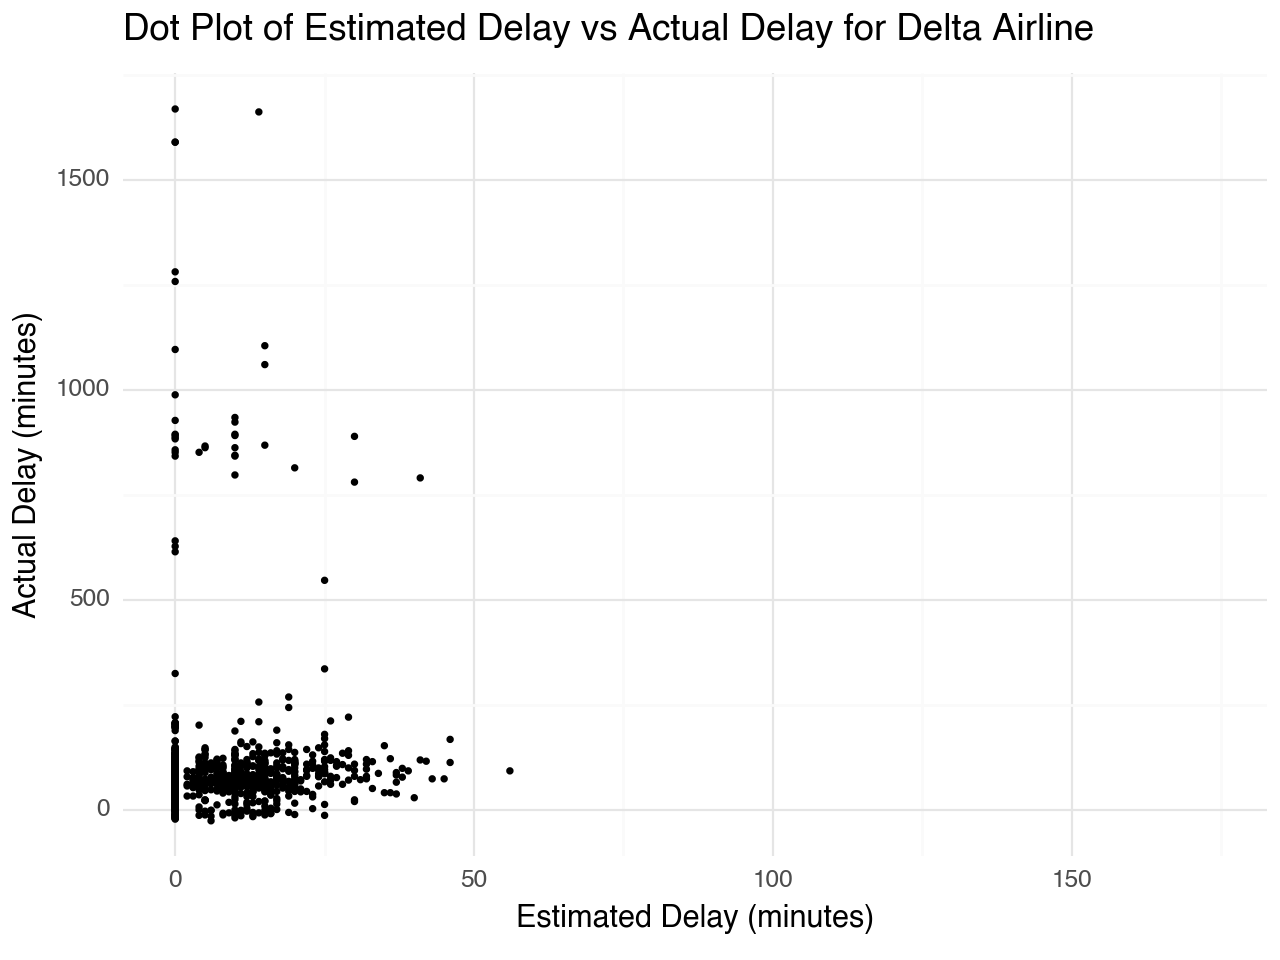

In [8]:
#good, although looks weird
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_minimal

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("ATL.csv")

# Assuming your DataFrame has columns like 'departure', 'active', 'arrival', 'airline', and 'flight'

# Function to extract scheduled time from departure details
def extract_scheduled_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('scheduledTime', pd.NaT))

# Function to extract estimated time from departure details
def extract_estimated_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('estimatedTime', pd.NaT))

# Extract relevant information using the defined functions
df['scheduledTime'] = df.apply(extract_scheduled_time, axis=1)
df['estimatedTime'] = df.apply(extract_estimated_time, axis=1)
df['estimatedDelay'] = (df['estimatedTime'] - df['scheduledTime']).dt.total_seconds() / 60.0
df['actualDelay'] = (pd.to_datetime(df['arrival'].apply(lambda x: eval(x).get('estimatedTime', pd.NaT))) - df['scheduledTime']).dt.total_seconds() / 60.0
df['airline'] = df['airline'].apply(lambda x: eval(x)['iataCode'])

# Filter only Delta airline flights
df_delta = df[df['airline'] == 'dl']

# Filter out negative values for the x-axis
df_delta = df_delta[df_delta['estimatedDelay'] >= 0]

# Plotting using plotnine
p = ggplot(df_delta, aes(x='estimatedDelay', y='actualDelay')) + \
    geom_point(size=0.5) + \
    labs(title='Dot Plot of Estimated Delay vs Actual Delay for Delta Airline',
         x='Estimated Delay (minutes)',
         y='Actual Delay (minutes)') + \
    theme_minimal()

# Show the plot
print(p)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


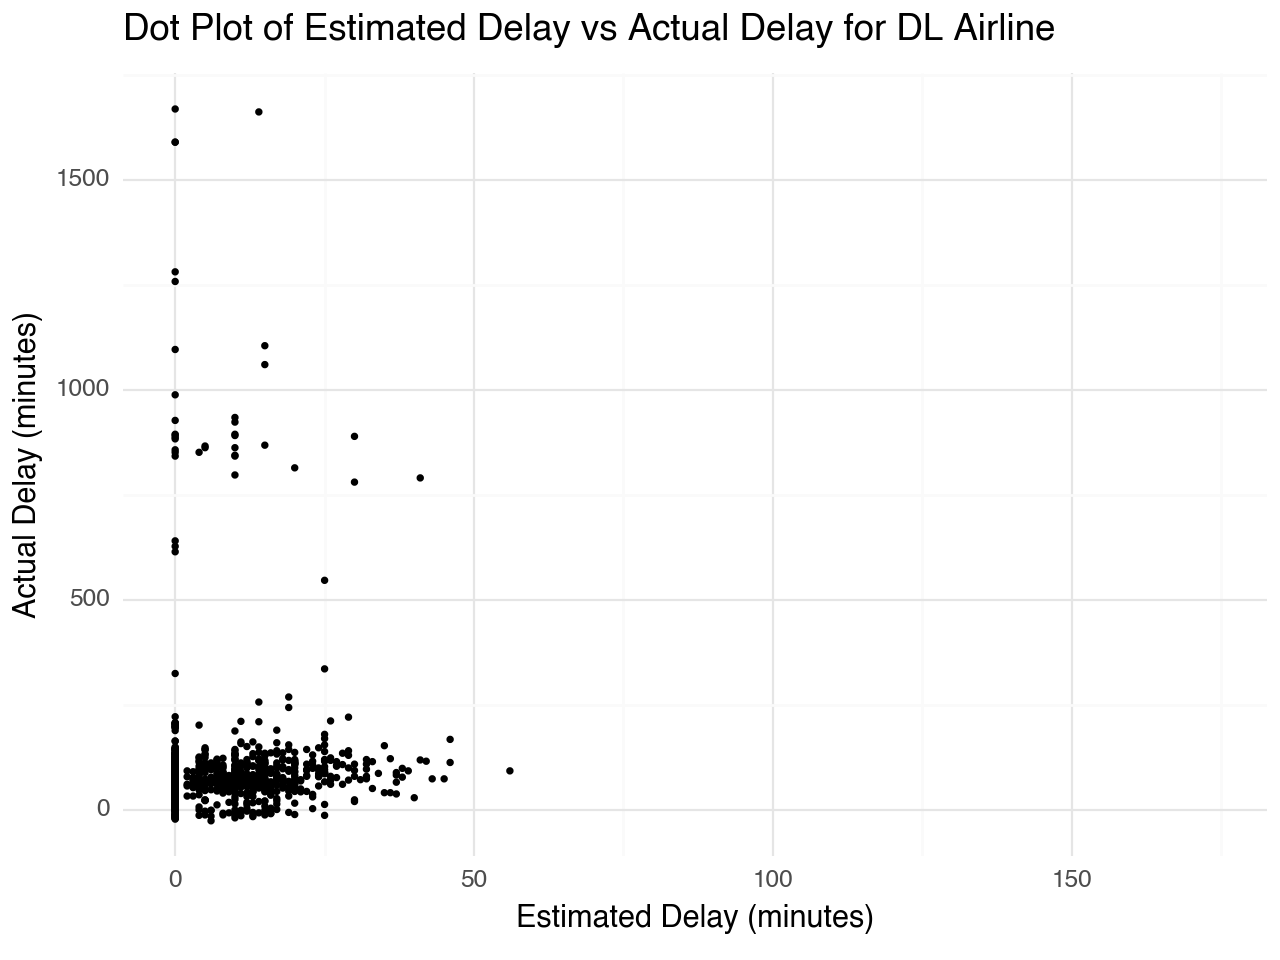

In [10]:
# good, updated with input airline
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_minimal

def create_delay_plot(data, airline_name):
    # Function to extract scheduled time from departure details
    def extract_scheduled_time(row):
        departure_details = eval(row['departure'])
        return pd.to_datetime(departure_details.get('scheduledTime', pd.NaT))

    # Function to extract estimated time from departure details
    def extract_estimated_time(row):
        departure_details = eval(row['departure'])
        return pd.to_datetime(departure_details.get('estimatedTime', pd.NaT))

    # Extract relevant information using the defined functions
    data['scheduledTime'] = data.apply(extract_scheduled_time, axis=1)
    data['estimatedTime'] = data.apply(extract_estimated_time, axis=1)
    data['estimatedDelay'] = (data['estimatedTime'] - data['scheduledTime']).dt.total_seconds() / 60.0
    data['actualDelay'] = (pd.to_datetime(data['arrival'].apply(lambda x: eval(x).get('estimatedTime', pd.NaT))) - data['scheduledTime']).dt.total_seconds() / 60.0
    data['airline'] = data['airline'].apply(lambda x: eval(x)['iataCode'])

    # Filter flights for the specified airline
    data_selected_airline = data[data['airline'] == airline_name]

    # Filter out negative values for the x-axis
    data_selected_airline = data_selected_airline[data_selected_airline['estimatedDelay'] >= 0]

    # Plotting using plotnine
    p = ggplot(data_selected_airline, aes(x='estimatedDelay', y='actualDelay')) + \
        geom_point(size=0.5) + \
        labs(title=f'Dot Plot of Estimated Delay vs Actual Delay for {airline_name.upper()} Airline',
             x='Estimated Delay (minutes)',
             y='Actual Delay (minutes)') + \
        theme_minimal()

    # Show the plot
    print(p)

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("ATL.csv")

# User input for the airline name
user_airline = input("Enter the airline name: ").strip().lower()

# Use the function with your DataFrame and specified airline name
create_delay_plot(df, user_airline)


In [3]:
# worked, but text box is ugly
import pandas as pd
import plotly.express as px

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("ATL.csv")

# Function to extract scheduled time from departure details
def extract_scheduled_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('scheduledTime', pd.NaT))

# Function to extract estimated time from departure details
def extract_estimated_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('estimatedTime', pd.NaT))

# Extract relevant information using the defined functions
df['scheduledTime'] = df.apply(extract_scheduled_time, axis=1)
df['estimatedTime'] = df.apply(extract_estimated_time, axis=1)
df['estimatedDelay'] = (df['estimatedTime'] - df['scheduledTime']).dt.total_seconds() / 60.0
df['actualDelay'] = (pd.to_datetime(df['arrival'].apply(lambda x: eval(x).get('estimatedTime', pd.NaT))) - df['scheduledTime']).dt.total_seconds() / 60.0
df['airline'] = df['airline'].apply(lambda x: eval(x)['iataCode'])
df['arrivalAirport'] = df['arrival'].apply(lambda x: eval(x)['icaoCode'])
df['destination'] = df['arrival'].apply(lambda x: eval(x).get('iataCode', pd.NaT))

# User input for the airline name
user_airline = input("Enter the airline name: ").strip().lower()

# User input for the arrival airport
user_arrival_airport = input("Enter the arrival airport (ICAO code): ").strip().lower()

# User input for the travel destination
user_destination = input("Enter the travel destination (IATA code): ").strip().lower()

# Filter flights for the specified airline, arrival airport, and destination
df_selected_flights = df[(df['airline'].str.lower() == user_airline) & (df['arrivalAirport'].str.lower() == user_arrival_airport) & (df['destination'].str.lower() == user_destination)]

# Filter out negative values for the x-axis
df_selected_flights = df_selected_flights[df_selected_flights['estimatedDelay'] >= 0]

# Create an interactive scatter plot with the date of travel on the x-axis and "actualDelay" on the y-axis
fig_date = px.scatter(df_selected_flights, x='scheduledTime', y='actualDelay', title=f'Dot Plot of Actual Delay vs Date of Travel for {user_airline.upper()} Airline to {user_arrival_airport.upper()}',
                 labels={'actualDelay': 'Actual Delay (minutes)', 'scheduledTime': 'Date of Travel'},
                 hover_name='flight',
                 hover_data={'flight': False, 'actualDelay': True, 'scheduledTime': '|%B %d, %Y %I:%M %p'},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )

# Show the interactive plot for the date of travel
fig_date.show()

# Create another interactive scatter plot with the estimated delay on the x-axis and actual delay on the y-axis
fig_delay = px.scatter(df_selected_flights, x='estimatedDelay', y='actualDelay', title=f'Dot Plot of Estimated Delay vs Actual Delay for {user_airline.upper()} Airline to {user_arrival_airport.upper()}',
                 labels={'estimatedDelay': 'Estimated Delay (minutes)', 'actualDelay': 'Actual Delay (minutes)'},
                 hover_name='flight',
                 hover_data={'flight': False, 'estimatedDelay': True, 'actualDelay': True},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )

# Show the interactive plot for the estimated delay
fig_delay.show()


# Try 1 
but it didn't work, in the next try we are going to do it step by step

In [16]:
#good, but no world map
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import pandas as pd

# Get user input for the departing airport and the airline
user_departure_airport = input("Enter the departing airport (ICAO code): ").strip().lower()
user_airline = input("Enter the airline (IATA code): ").strip().lower()

# Load your CSV data into a pandas DataFrame (replace 'ATL.csv' with the actual file path)
df = pd.read_csv('ATL.csv')

# Filter the data based on user input
df['departureDetails'] = df['departure'].apply(eval)
df['iataCode'] = df['departureDetails'].apply(lambda x: x.get('iataCode', '').lower())
df['airline_iataCode'] = df['airline'].apply(lambda x: eval(x).get('iataCode', '').lower())
df = df[(df['iataCode'] == user_departure_airport) & (df['airline_iataCode'] == user_airline)]

# Extract relevant information from the nested columns
df['departureDetails'] = df['departure'].apply(eval)
df['delay'] = df['departureDetails'].apply(lambda x: x.get('delay', 0))

# Count the number of delayed flights for each airport
delay_counts = df.groupby(['iataCode', 'airline_iataCode']).size().reset_index(name='DelayQuantity')

# Merge the delay counts with the world map data
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world_data.merge(delay_counts, how='left', left_index=True, right_index=True)

# Plot the world map with a gradient color based on the quantity of delays
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
cmap = cm.get_cmap('viridis')  # You can choose a different colormap
norm = Normalize(vmin=merged_data['DelayQuantity'].min(), vmax=merged_data['DelayQuantity'].max())
merged_data.plot(column='DelayQuantity', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)

# Customize the plot
ax.set_title(f'World Map with Gradient Color Based on Delay Quantity\n{user_airline.upper()} Airline from {user_departure_airport.upper()}')
ax.set_axis_off()  # Turn off axis

# Add a colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', shrink=0.6, aspect=20)
cbar.set_label('Delay Quantity')

plt.show()



KeyboardInterrupt: Interrupted by user

In [12]:
print(merged_data)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

In [15]:
import pandas as pd

# Assuming df is your original DataFrame
# Load your CSV data into a pandas DataFrame (replace 'ATL.csv' with the actual file path)
df = pd.read_csv('ATL.csv')

# Filter the data for flights departing from ATL
df['departureDetails'] = df['departure'].apply(eval)
df['iataCode'] = df['departureDetails'].apply(lambda x: x.get('iataCode', '').lower())
df_atl = df[df['iataCode'] == 'atl']

# Extract relevant information from the nested columns
df_atl['departureDetails'] = df_atl['departure'].apply(eval)
df_atl['delay'] = df_atl['departureDetails'].apply(lambda x: x.get('delay', 0))

# Create a DataFrame with average minutes of delays for each destination airport
average_delay_df = df_atl.groupby('arrival').agg({'delay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


                                                arrival  delay
0     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   14.0
1     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   18.0
2     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   14.0
3     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   19.0
4     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...    8.0
...                                                 ...    ...
2322  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   20.0
2323  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   26.0
2324  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...    5.0
2325  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   30.0
2326  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   16.0

[2327 rows x 2 columns]


# Try 2 

In [42]:
import pandas as pd

# Load your new dataset (replace 'new_dataset.csv' with your actual file path)
df = pd.read_csv('final_data (2).csv')

# Convert the "delay in mins" column to numeric (if it's not already)
df['delay in mins'] = pd.to_numeric(df['delay in mins'], errors='coerce')

# Create a DataFrame with average minutes of delays for each departure airport
average_delay_df = df.groupby('departure airport IATA').agg({'delay in mins': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


AttributeError: Can only use .str accessor with string values!

In [43]:
# sorted by arrival airports and consolidated delay
import pandas as pd

# Load your new dataset (replace 'final_data (2).csv' with your actual file path)
df = pd.read_csv('final_data (2).csv')

# Convert the 'estimatedDelay' column to numeric (if it's not already)
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

# Create a DataFrame with average minutes of estimated delays for each departure airport
average_delay_df = df.groupby('departure airport IATA').agg({'estimatedDelay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


   departure airport IATA  estimatedDelay
0        'iataCode': 'akl       11.059779
1        'iataCode': 'ams       22.995820
2        'iataCode': 'atl       10.413907
3        'iataCode': 'auh       12.274595
4        'iataCode': 'ayt       20.310247
..                    ...             ...
62       'iataCode': 'syd       17.706268
63       'iataCode': 'yvr       20.273369
64       'iataCode': 'yyc       20.650644
65       'iataCode': 'yyz       27.342095
66       'iataCode': 'zrh       19.838690

[67 rows x 2 columns]


In [59]:
# sorted, consolidated, and has input command
import pandas as pd

# Assuming your dataset is stored in 'final_data (2).csv'
df = pd.read_csv('final_data (2).csv')

# Assuming the column names in your dataset are 'departure airport IATA', 'arrival airport IATA', 'delay in mins', 'estimatedDelay', 'Airline Company'

# Convert 'estimatedDelay' to numeric (if it's not already)
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

# Get user input for the departure airport IATA code
user_departure_airport = input("Enter the departure airport IATA code: ").strip()

# Filter for flights departing from the specified airport
df_user_departure = df[df['departure airport IATA'].str.contains(user_departure_airport, na=False)]

# Create a DataFrame with average estimatedDelay for each arrival airport
average_delay_df = df_user_departure.groupby('arrival airport IATA').agg({'estimatedDelay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


    arrival airport IATA  estimatedDelay
0       'iataCode': 'abe        9.153846
1       'iataCode': 'abq        7.200000
2       'iataCode': 'aby       32.285714
3       'iataCode': 'add        0.000000
4       'iataCode': 'aex       -1.500000
..                   ...             ...
220     'iataCode': 'yul       18.476190
221     'iataCode': 'yvr       11.666667
222     'iataCode': 'yyc       10.000000
223     'iataCode': 'yyt             NaN
224     'iataCode': 'yyz       17.795918

[225 rows x 2 columns]


In [38]:
# filter down to arrival airport and final delay, not consolidated
import pandas as pd

# Assuming df is your original DataFrame
# Load your CSV data into a pandas DataFrame (replace 'ATL.csv' with the actual file path)
df = pd.read_csv('final_data(2).csv')

# Filter the data for flights departing from ATL
# *we will need to change this later on into input by user* 
df['departureDetails'] = df['departure'].apply(eval)
df['iataCode'] = df['departureDetails'].apply(lambda x: x.get('iataCode', '').lower())
df_atl = df[df['iataCode'] == 'atl']

# Extract relevant information from the nested columns
df_atl['departureDetails'] = df_atl['departure'].apply(eval)
df_atl['delay'] = df_atl['departureDetails'].apply(lambda x: x.get('delay', 0))

# Create a DataFrame with average minutes of delays for each destination airport
average_delay_df = df_atl.groupby('arrival').agg({'delay': 'mean'}).reset_index()

# Print the resulting DataFrame
# print(average_delay_df)
average_delay_df


FileNotFoundError: [Errno 2] No such file or directory: 'final_data(2).csv'

In [33]:
# arrival airport and average delays 
import pandas as pd

# Load your CSV data into a pandas DataFrame (replace 'ATL.csv' with the actual file path)
df = pd.read_csv('ATL.csv')

# Extract relevant information from the nested columns
df['departureDetails'] = df['departure'].apply(eval)
df['arrivalDetails'] = df['arrival'].apply(eval)
df['iataCode'] = df['arrivalDetails'].apply(lambda x: x.get('iataCode', '').lower())
df['delay'] = df['departureDetails'].apply(lambda x: x.get('delay', 0))

# Filter for flights with delays
delayed_flights = df[df['delay'] > 0]

# Calculate average delay for each arrival airport
average_delay_df = delayed_flights.groupby('iataCode').agg({'delay': 'mean', 'flight': 'count'}).reset_index()
average_delay_df.rename(columns={'delay': 'averageDelay', 'flight': 'numDelayedFlights'}, inplace=True)

# Print the resulting DataFrame
print(average_delay_df)


    iataCode  averageDelay  numDelayedFlights
0        abe     14.736842                 19
1        abq     22.200000                 20
2        aby     19.416667                 12
3        add     25.000000                  1
4        aex     23.052632                 19
..       ...           ...                ...
210      xna     16.307692                 26
211      yul     31.638889                 36
212      yvr     52.000000                  4
213      yyc     27.333333                  6
214      yyz     35.566667                 60

[215 rows x 3 columns]


In [32]:
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gpd


In [24]:
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

AttributeError: 'DataFrame' object has no attribute 'Longitude'

In [23]:
path_to_data = pd.datasets.get_path(inputs['dataset'])
gdf = pd.read_file(path_to_data)

AttributeError: module 'pandas' has no attribute 'datasets'

/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_24554/2641534961.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')




Text(0.5, 1.0, 'World countries')

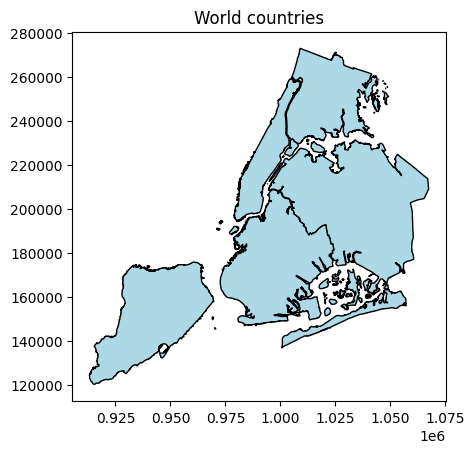

In [31]:
world_data= gpd.read_file(gpd.datasets.get_path('nybb'))

axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
# df_geo.plot(ax = axis, color = 'red', markersize= 1)

#13.2 print out the map 
plt.title('World countries')

In [ ]:
import pandas as pd

# Load your existing DataFrame with average delays (replace 'average_delay_df.csv' with the actual file path)
average_delay_df = pd.read_csv('average_delay_df.csv')

# Load the airports.csv data into a pandas DataFrame
airports_df = pd.read_csv('airports.csv')

# Extract longitude and latitude from the 'location' column
airports_df[['longitude', 'latitude']] = airports_df['location'].str.extract(r'\(([-\d.]+) ([-\d.]+)\)').astype(float)

# Merge the existing DataFrame with the airports DataFrame based on IATA codes
merged_df = pd.merge(average_delay_df, airports_df[['code', 'longitude', 'latitude']], left_on='icaoCode', right_on='code', how='left')

# Drop the duplicate 'code' column from the merge
merged_df = merged_df.drop(columns='code')

# Print the resulting DataFrame
print(merged_df)


# old code on geopanda
# 10. it's important to install everything below
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

# 11. we can extract information about the coordinate from the list of all countries in the 19th century
df = pd.read_csv('countries_19th_century.csv')
df

# 12. the geopanda functions will make points out of the coordinates supplied by longitude and latitude data
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

# 13. this command specifies the kind of map we want. 
world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 13.1 more customization 
axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)

#13.2 print out the map 
plt.title('World countries')

# repeat step 11- 13 for data frame of wars in the 20th century
df_20th_century

df = pd.read_csv('countries_20th_century.csv')
df
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)
plt.title('World countries')# old code on geopanda
# 10. it's important to install everything below
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

# 11. we can extract information about the coordinate from the list of all countries in the 19th century
df = pd.read_csv('countries_19th_century.csv')
df

# 12. the geopanda functions will make points out of the coordinates supplied by longitude and latitude data
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

# 13. this command specifies the kind of map we want. 
world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 13.1 more customization 
axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)

#13.2 print out the map 
plt.title('World countries')

# repeat step 11- 13 for data frame of wars in the 20th century
df_20th_century

df = pd.read_csv('countries_20th_century.csv')
df
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)
plt.title('World countries')